# Import required libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='iso-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
df.columns = ['Label','Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam = df.groupby('Label')['Message'].count()
spam

Label
ham     4825
spam     747
Name: Message, dtype: int64

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['spam'] = label_encoder.fit_transform(df['Label'])
df.head()

,Label,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


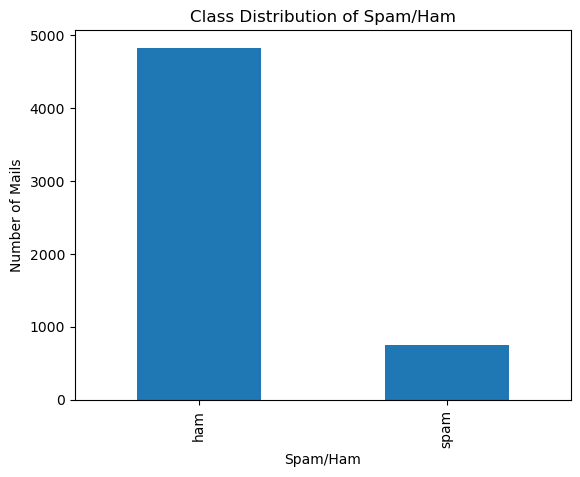

In [10]:
class_counts = df['Label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

# **Declaring Count Vectorizer**

In [11]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(df['Message'])

X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.3, random_state=101)

In [12]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#  **Creating a Multinomial Naive Bayes Model**

In [13]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('Training accuracy is: ',mnb.score(X_train,y_train)*100)
print('Test accuracy is: ',mnb.score(X_test,y_test)*100)

Training accuracy is:  99.41025641025641
Test accuracy is:  98.56459330143541


# **Visualizing the results**

In [14]:
def visualize(label):
    words = ''
    for msg in df[df['Label']==label]['Message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

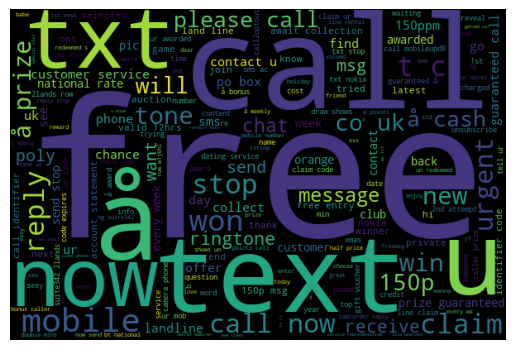

In [15]:
visualize('spam')

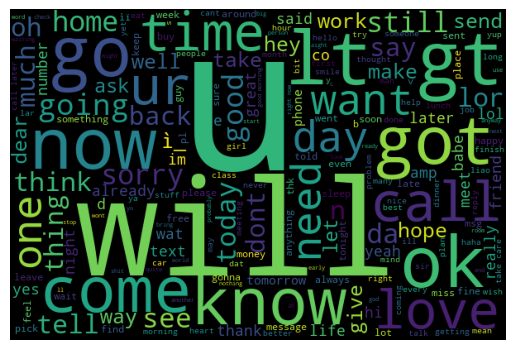

In [16]:
visualize('ham')

#  **Predicting Outcome** 

In [17]:
# just type in your message and run
your_message = 'You are the lucky winner for the lottery price of $6million.'
your_message = cv.transform([your_message])
claass = mnb.predict(your_message)
print(f'This is a {claass[0]} message')

This is a spam message
